In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing the data
data = pd.read_csv(r'C:\Users\SONU KUMAR JHA\Documents\R\Datasets\Disease\indian_liver_patient.csv')

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data = data.rename(columns={'Dataset':'disease'})

In [5]:
data.Gender = data.Gender.astype('category')
data.Gender = data.Gender.cat.codes

In [6]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
disease                       0
dtype: int64

In [8]:
# Missing value treatment
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [9]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
disease                       0
dtype: int64

In [10]:
# Independent and dependent variable
X = data.copy()
y = X.pop('disease')

In [11]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=.3)

In [15]:
# Fitting the model
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=100,random_state=1234)
m.fit(X_train,y_train)
m.oob_score_

0.7034313725490197

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = m.predict(X_valid)
cm = confusion_matrix(y_valid,y_pred)
print(cm)
print(classification_report(y_valid,y_pred))
print(accuracy_score(y_valid,y_pred))

[[102  27]
 [ 27  19]]
             precision    recall  f1-score   support

          1       0.79      0.79      0.79       129
          2       0.41      0.41      0.41        46

avg / total       0.69      0.69      0.69       175

0.6914285714285714


# Tuning the model

## Optimal number of trees

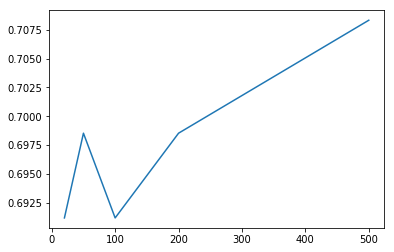

In [20]:
res = []
ntrees = [20,50,100,200,500]
for trees in ntrees:
    m = RandomForestClassifier(n_jobs=-1,n_estimators=trees,oob_score=True,random_state=123)
    m.fit(X_train,y_train)
    score = m.oob_score_
    res.append(score)

pd.Series(res,ntrees).plot()

## optimal no of max features

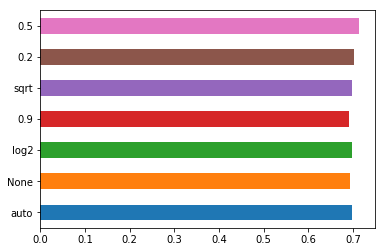

In [21]:
res = []
max_feature_options = ['auto',None,'log2',.9,'sqrt',.2,.5]
for feats in max_feature_options:
    m = RandomForestClassifier(n_jobs=-1,n_estimators=200,max_features=feats,oob_score=True,random_state=123)
    m.fit(X_train,y_train)
    score = m.oob_score_
    res.append(score)

pd.Series(res,max_feature_options).plot(kind = 'barh')

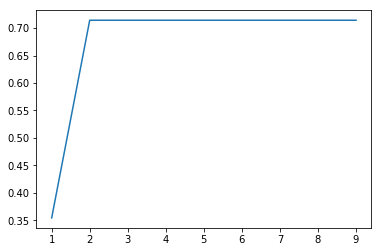

In [93]:
res = []
min_samples = [1,2,3,4,5,6,7,8,9]
for min in min_samples:
    m = RandomForestClassifier(n_jobs=-1,n_estimators=200,max_features=.5,min_samples_leaf=min)
    m.fit(X_train,y_train)
    score = m.score(X_test,y_test)
    res.append(score)

pd.Series(res,min_samples).plot()

In [94]:
m = RandomForestClassifier(n_jobs=-1,oob_score=True,n_estimators=200,max_features=.5,min_samples_leaf=2)
m.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = m.predict(X_valid)
cm = confusion_matrix(y_valid,y_pred)
print(cm)
print(classification_report(y_valid,y_pred))
print(accuracy_score(y_valid,y_pred))

[[109  14]
 [ 36  16]]
             precision    recall  f1-score   support

          1       0.75      0.89      0.81       123
          2       0.53      0.31      0.39        52

avg / total       0.69      0.71      0.69       175

0.7142857142857143


# Feature Importance

In [96]:
def rf_feat_importance(m,df):
    return pd.DataFrame({'cols':df.columns,'imp':m.feature_importances_}).sort_values(by='imp',ascending=False)

In [97]:
fi = rf_feat_importance(m, X_train);fi[:10]

,cols,imp
5,Alamine_Aminotransferase,0.140486
6,Aspartate_Aminotransferase,0.140297
4,Alkaline_Phosphotase,0.138361
0,Age,0.131645
2,Total_Bilirubin,0.100533
8,Albumin,0.094981
3,Direct_Bilirubin,0.083384
7,Total_Protiens,0.082984
9,Albumin_and_Globulin_Ratio,0.072990
1,Gender,0.014339


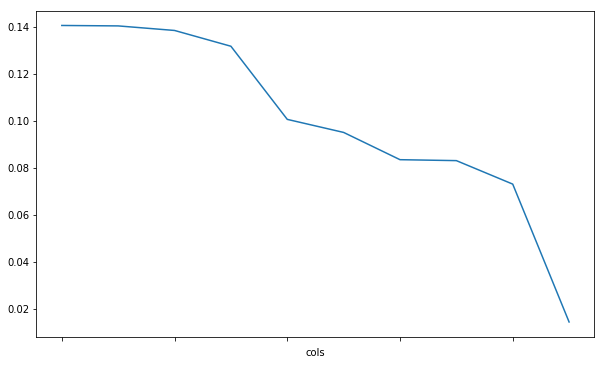

In [98]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False)

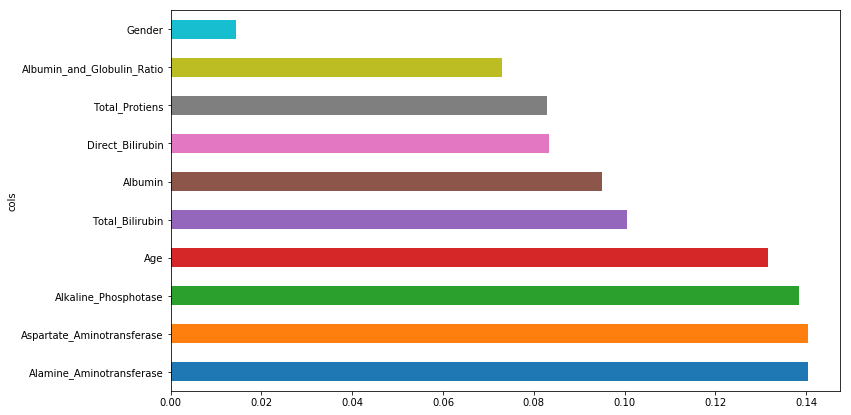

In [99]:
def plot_fi(fi): 
  return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [100]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)
df_keep = data[to_keep].copy()
y_keep = data['disease']

In [101]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_keep,y,test_size=.3)

In [102]:
# Fitting the model
from sklearn.ensemble import RandomForestClassifier
m = RandomForestClassifier(n_jobs=-1,oob_score=True,max_features='sqrt',min_samples_leaf=2,max_depth=3,n_estimators=100)
m.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [103]:
fi = rf_feat_importance(m, X_train);fi[:10]

,cols,imp
2,Alkaline_Phosphotase,0.243743
1,Aspartate_Aminotransferase,0.189833
6,Direct_Bilirubin,0.130881
4,Total_Bilirubin,0.128886
0,Alamine_Aminotransferase,0.101896
3,Age,0.084538
8,Albumin_and_Globulin_Ratio,0.043141
5,Albumin,0.039332
7,Total_Protiens,0.035923
9,Gender,0.001827


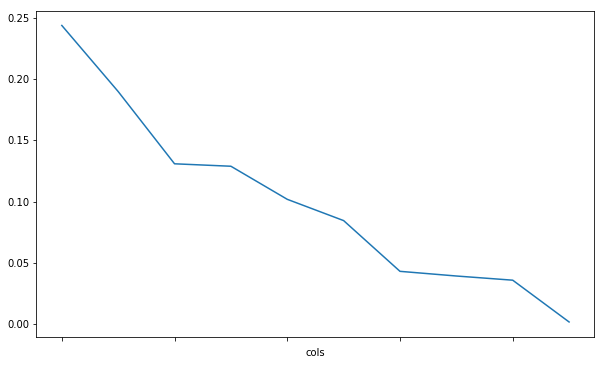

In [104]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False)

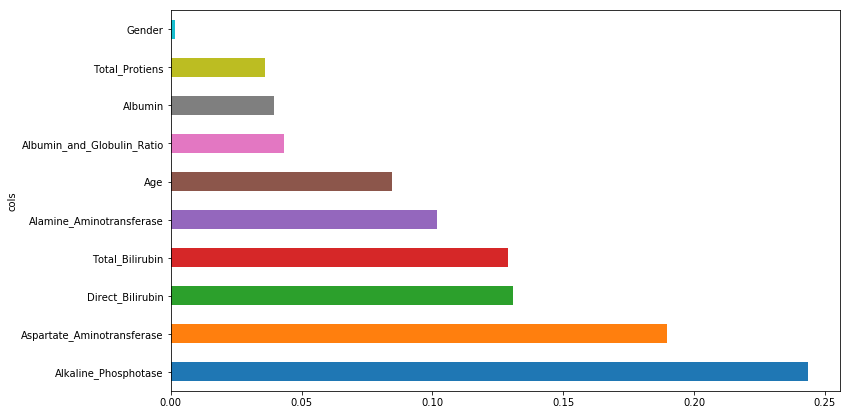

In [105]:
plot_fi(fi[:30]);

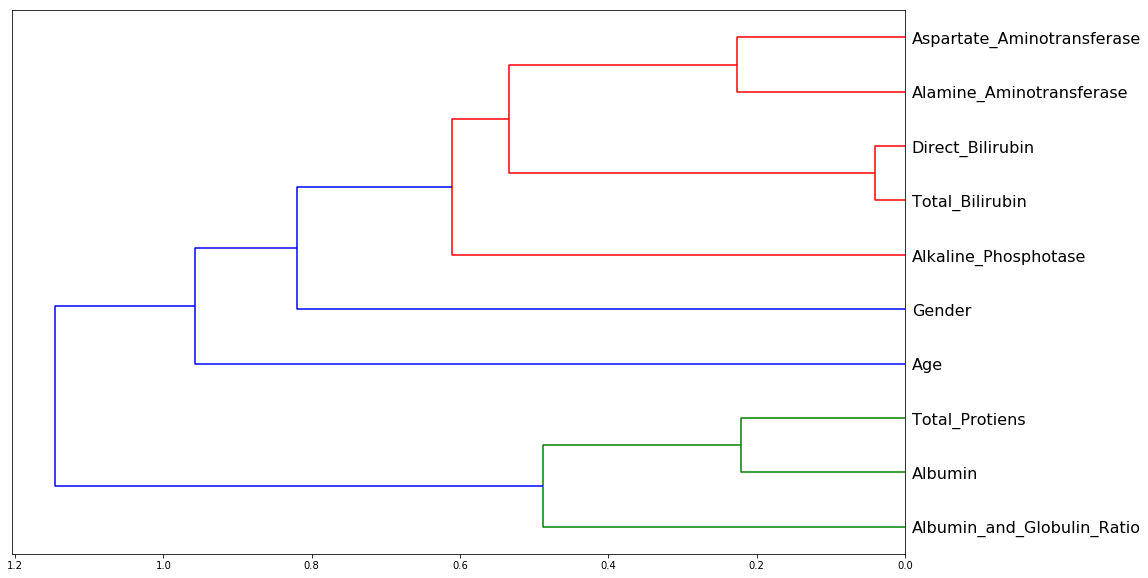

In [106]:
from scipy.cluster import hierarchy as hc
import scipy
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, 
      orientation='left', leaf_font_size=16)
plt.show()

In [107]:
y_pred = m.predict(X_valid)
cm = confusion_matrix(y_valid,y_pred)
print(cm)
print(classification_report(y_valid,y_pred))
print(accuracy_score(y_valid,y_pred))

[[123   0]
 [ 52   0]]
             precision    recall  f1-score   support

          1       0.70      1.00      0.83       123
          2       0.00      0.00      0.00        52

avg / total       0.49      0.70      0.58       175

0.7028571428571428


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
# removing related features
def get_oob(df):
    m = RandomForestClassifier(n_estimators=30, min_samples_leaf=3, 
           max_features='sqrt' ,n_jobs=-1, oob_score=True)
    m.fit(X_)